In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def calculate_futures_profit(contract_size, initial_price, current_price):
    """
    Calculates the profit or loss for a futures contract.

    Parameters:
    contract_size (float): The size of the futures contract (in pounds).
    initial_price (float): The initial price (in cents per pound) at which the contract was sold.
    current_price (float): The current futures price (in cents per pound).

    Returns:
    float: The profit or loss in dollars.
    """
    profit_or_loss = (initial_price - current_price) * contract_size / 100
    return profit_or_loss

# Fill in the information below
contract_size = 40000  # pounds
initial_price = 185  # cents per pound
current_price = 172  # cents per pound

# Calculate profit or loss
profit_or_loss = calculate_futures_profit(contract_size, initial_price, current_price)
print(f"Profit or Loss: ${profit_or_loss:.2f}")


Profit or Loss: $5200.00


In [6]:
def check_arbitrage(futures_price, cash_price):
    """
    Checks if there is an arbitrage opportunity between futures price and cash price.

    Parameters:
    futures_price (float): The futures price (in cents per pound).
    cash_price (float): The cash price (in cents per pound).

    Returns:
    str: Message indicating if there is an arbitrage opportunity.
    """
    if cash_price > futures_price:
        return "Arbitrage opportunity exists: Cash price is higher than futures price."
    else:
        return "No arbitrage opportunity: Cash price is not higher than futures price."

# Fill in the information below
futures_price = 172  # cents per pound
cash_price = 180.97  # cents per pound

# Check arbitrage opportunity
arbitrage_message = check_arbitrage(futures_price, cash_price)
print(arbitrage_message)


Arbitrage opportunity exists: Cash price is higher than futures price.


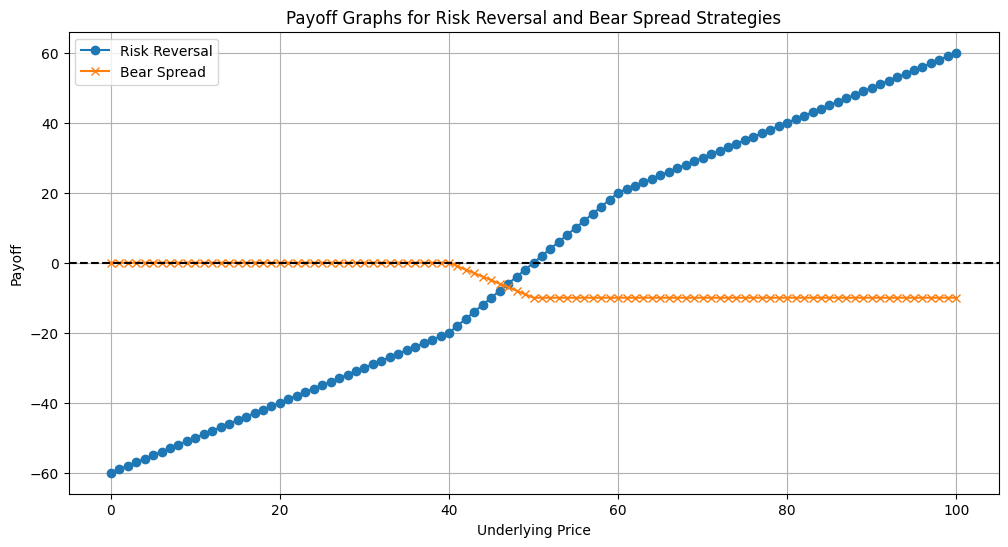

In [3]:
def calculate_payoff_risk_reversal(prices, K):
    payoff = []
    for price in prices:
        payoff_put = -max(1.2 * K - price, 0)  # Short put position
        payoff_call = max(price - 0.8 * K, 0)  # Long call position
        payoff.append(payoff_put + payoff_call)
    return payoff

def calculate_payoff_bear_spread(prices, K):
    payoff = []
    for price in prices:
        payoff_short_call = -max(price - 0.8 * K, 0)  # Short call position
        payoff_long_call = max(price - K, 0)  # Long call position
        payoff.append(payoff_short_call + payoff_long_call)
    return payoff

# Define the price range and strike price
prices = np.arange(0, 101, 1)  # Price range from 0 to 100
K = 50  # Strike price in DKK

# Calculate payoffs
payoff_risk_reversal = calculate_payoff_risk_reversal(prices, K)
payoff_bear_spread = calculate_payoff_bear_spread(prices, K)

# Plotting the payoffs
plt.figure(figsize=(12, 6))
plt.plot(prices, payoff_risk_reversal, label='Risk Reversal', linestyle='-', marker='o')
plt.plot(prices, payoff_bear_spread, label='Bear Spread', linestyle='-', marker='x')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Payoff')
plt.title('Payoff Graphs for Risk Reversal and Bear Spread Strategies')
plt.legend()
plt.grid(True)
plt.show()


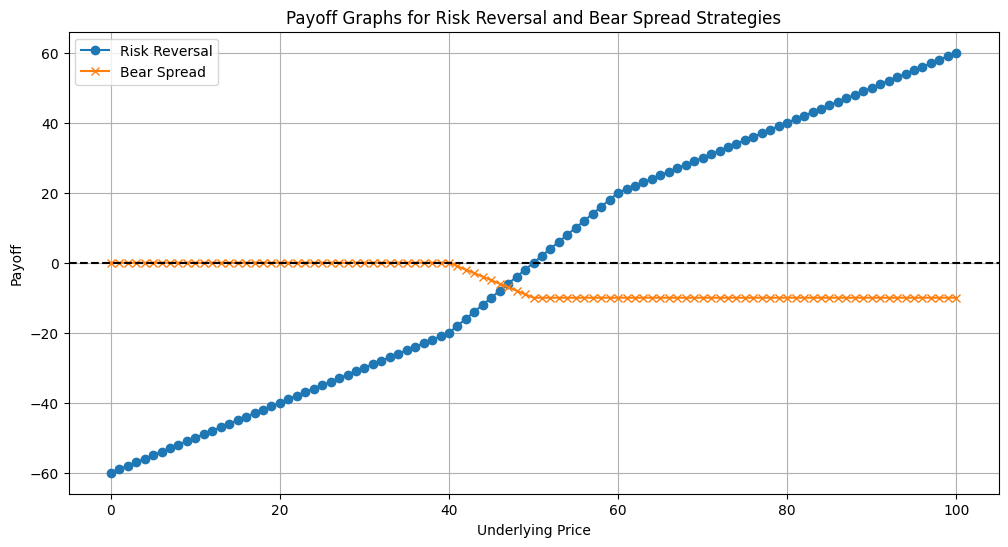

     Underlying Price  Risk Reversal Payoff  Bear Spread Payoff
0                   0                 -60.0                 0.0
1                   1                 -59.0                 0.0
2                   2                 -58.0                 0.0
3                   3                 -57.0                 0.0
4                   4                 -56.0                 0.0
..                ...                   ...                 ...
96                 96                  56.0               -10.0
97                 97                  57.0               -10.0
98                 98                  58.0               -10.0
99                 99                  59.0               -10.0
100               100                  60.0               -10.0

[101 rows x 3 columns]

Payoff at Underlying Price of 65:
     Underlying Price  Risk Reversal Payoff  Bear Spread Payoff
65                65                  25.0               -10.0


In [8]:
# Define parameters
K = 50  # Strike price in DKK
prices = np.arange(0, 101, 1)  # Underlying price from 0 to 100 DKK

# Calculate Payoff for Risk Reversal
def calculate_payoff_risk_reversal(prices, K):
    payoff = []
    for price in prices:
        payoff_put = -max(1.2 * K - price, 0)  # Short put position at 1.2K
        payoff_call = max(price - 0.8 * K, 0)  # Long call position at 0.8K
        payoff.append(payoff_put + payoff_call)
    return payoff

# Calculate Payoff for Bear Spread
def calculate_payoff_bear_spread(prices, K):
    payoff = []
    for price in prices:
        payoff_short_call = -max(price - 0.8 * K, 0)  # Short call position at 0.8K
        payoff_long_call = max(price - K, 0)  # Long call position at K
        payoff.append(payoff_short_call + payoff_long_call)
    return payoff

# Calculate payoffs
payoff_risk_reversal = calculate_payoff_risk_reversal(prices, K)
payoff_bear_spread = calculate_payoff_bear_spread(prices, K)

# Plotting the payoffs
plt.figure(figsize=(12, 6))
plt.plot(prices, payoff_risk_reversal, label='Risk Reversal', linestyle='-', marker='o')
plt.plot(prices, payoff_bear_spread, label='Bear Spread', linestyle='-', marker='x')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Payoff')
plt.title('Payoff Graphs for Risk Reversal and Bear Spread Strategies')
plt.legend()
plt.grid(True)
plt.show()

# Create a payoff table for both strategies
payoff_table = pd.DataFrame({
    'Underlying Price': prices,
    'Risk Reversal Payoff': payoff_risk_reversal,
    'Bear Spread Payoff': payoff_bear_spread
})
print(payoff_table)

# Show the payoff at an underlying price of 65
payoff_at_65 = payoff_table[payoff_table['Underlying Price'] == 65]
print("\nPayoff at Underlying Price of 65:\n", payoff_at_65)

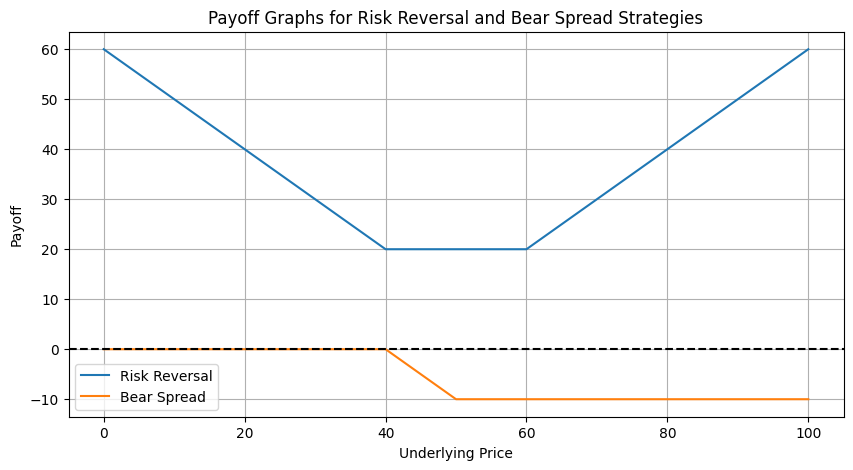

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_payoff_risk_reversal(prices, strike_put, strike_call):
    """
    Calculates the payoff for a risk reversal strategy.
    
    Parameters:
    prices (array-like): List of underlying prices.
    strike_put (float): Strike price for the short put position.
    strike_call (float): Strike price for the long call position.
    
    Returns:
    list: Payoff values for each price in 'prices'.
    """
    payoff = []
    for price in prices:
        payoff_put = max(strike_put - price, 0)  # Short put position
        payoff_call = max(price - strike_call, 0)  # Long call position
        payoff.append(payoff_put + payoff_call)
    return payoff

def calculate_payoff_bear_spread(prices, strike_short_call, strike_long_call):
    """
    Calculates the payoff for a bear spread strategy.
    
    Parameters:
    prices (array-like): List of underlying prices.
    strike_short_call (float): Strike price for the short call position.
    strike_long_call (float): Strike price for the long call position.
    
    Returns:
    list: Payoff values for each price in 'prices'.
    """
    payoff = []
    for price in prices:
        payoff_short_call = -max(price - strike_short_call, 0)  # Short call position
        payoff_long_call = max(price - strike_long_call, 0)  # Long call position
        payoff.append(payoff_short_call + payoff_long_call)
    return payoff

# Define parameters
K = 50  # Central Strike price in DKK
strike_put = 1.2 * K  # Strike price for the short put (60)
strike_call = 0.8 * K  # Strike price for the long call (40)
strike_short_call = 0.8 * K  # Strike price for the short call in bear spread (40)
strike_long_call = K  # Strike price for the long call in bear spread (50)
prices = np.arange(0, 101, 1)  # Underlying price range from 0 to 100

# Calculate payoffs
payoff_risk_reversal = calculate_payoff_risk_reversal(prices, strike_put, strike_call)
payoff_bear_spread = calculate_payoff_bear_spread(prices, strike_short_call, strike_long_call)

# Plotting the payoffs
plt.figure(figsize=(10, 5))
plt.plot(prices, payoff_risk_reversal, label='Risk Reversal', linestyle='-', marker='')
plt.plot(prices, payoff_bear_spread, label='Bear Spread', linestyle='-', marker='')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Underlying Price')
plt.ylabel('Payoff')
plt.title('Payoff Graphs for Risk Reversal and Bear Spread Strategies')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def calculate_lcos(investment_cost, annual_maintenance_cost, end_of_life_cost, annual_energy, lifetime, discount_rate):
    """
    Calculates the levelized cost of storage (LCOS).

    Parameters:
    investment_cost (float): Initial investment cost (in €).
    annual_maintenance_cost (float): Yearly operation and maintenance costs (in €).
    end_of_life_cost (float): End-of-life costs (in €).
    annual_energy (float): Yearly energy charged (in MWh).
    lifetime (int): Project lifetime (in years).
    discount_rate (float): Discount rate (as a decimal).

    Returns:
    float: Levelized cost of storage (in €/MWh).
    """
    discounted_costs = investment_cost
    for year in range(1, lifetime + 1):
        discounted_costs += annual_maintenance_cost / (1 + discount_rate) ** year
    discounted_costs += end_of_life_cost / (1 + discount_rate) ** lifetime

    discounted_energy = 0
    for year in range(1, lifetime + 1):
        discounted_energy += annual_energy / (1 + discount_rate) ** year

    lcos = discounted_costs / discounted_energy
    return lcos

# Fill in the information below
investment_cost = 17_500_000  # in €
annual_maintenance_cost = 17_500  # in €
end_of_life_cost = 75_000  # in €
annual_energy = 29_200  # in MWh
lifetime = 3  # in years
discount_rate = 0.03  # 3%

# Calculate LCOS
lcos = calculate_lcos(investment_cost, annual_maintenance_cost, end_of_life_cost, annual_energy, lifetime, discount_rate)
print(f"Levelized Cost of Storage: €{lcos:.2f} per MWh")


Levelized Cost of Storage: €213.31 per MWh
